In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.__version__
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Anàlsis de dades

In [4]:
# Revisem la forma i tipus de dades
print(x_train.shape)
print(x_train.dtype)
print(x_train[88])

(60000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   8  76 202 254 255 163  37   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13 182 253 253 253 253 253 253  23
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15 179 253 253 212  91 218 253 253 179
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 105 253 253 160  35 156 253 253 253 253
  250 113   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  19 212 253 

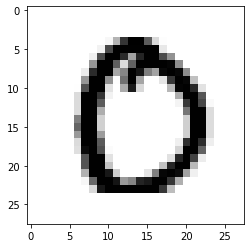

In [5]:
#Visualitzem la imatge
import matplotlib.pyplot as plt
plt.imshow(x_train[88], cmap=plt.cm.binary)

# Pre-processament de les dades

In [6]:
# Primer convertirem del tipus uint8 a float32 oer tenir representació decimal
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
# Normalizar
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# conversio de la matriu 28 x 28 a vector unidimensional de 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# comprova el resultat
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# Transformem la sortida a un vector bolea de mida 10
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Comprovem el resultat
print(y_train[88])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Crear xarxa neuronal

In [20]:
# Importem les llibreries necessaries
from keras.models import Sequential
from keras.layers import Dense

# Definim el tipus de xarxa neuronal
model = Sequential()

# Afegim una capa de 10 neurones amb 784 entrades i funció d'activació simoidea
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))

# Afegim una capa de sortida de 10 neurones amb la funció d'activació softmax
model.add(Dense(10, activation='softmax'))

# Visualitzem l'estructura de la xarxa neuronal
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


# Procés d'entrenament

In [25]:
# Configuració del procés d'entrenament
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Inici d'entrenament
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6154 - accuracy: 0.8585
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5588 - accuracy: 0.8677
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5172 - accuracy: 0.8736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4855 - accuracy: 0.8789
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4605 - accuracy: 0.8843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4403 - accuracy: 0.8874
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4235 - accuracy: 0.8903
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4095 - accuracy: 0.8927
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3974 - accuracy: 0.8956
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.387

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss:',test_loss)
print('accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.9001
loss: 0.37307366728782654
accuracy: 0.9000999927520752


In [26]:
prediccio = model.predict(np.array([x_test[0]]))

print(prediccio)
print('Prediccio: ', np.argmax(prediccio))
print('Resposta: ', np.argmax(y_test[0]))

1/1 [==============================] - 0s 49ms/step
[[5.4063690e-03 1.3011791e-03 1.2610538e-03 3.8177783e-03 2.9632915e-04
  1.8901734e-03 5.7678018e-05 9.4510031e-01 2.3185054e-03 3.8550727e-02]]
Prediccio:  7
Resposta:  7


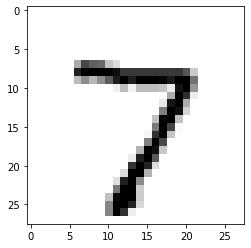

In [24]:
plt.imshow(x_test[0].reshape(28,28), cmap=plt.cm.binary)